
<img src="https://ecpx2w.bn.files.1drv.com/y4pKVOC-COut733VBVnMcuG4DpMFOZx6RRyUbvAwJw6ssoh9jrJEUklxLx5jzzX_r0lWiC-IEW_OAkShjinT-uGCMjRPb-oOumYNpMo18t4ZA2UdsjMRC_fPqoduD1Xi_BW5LSp48b3RgcdxOq6OYwFdVmQa9lrcnlC0S5f7ByEsxLAQ_HzEdH-fLJcPVuFVEbFX6xoPyvVwajJgxtbW1h32e3irSMxuJ4WrJDD8Pc5ltQ/lognormal2.png?psid=1" alt="drawing" style="width:1000px;"/>

---

# Python Log Normal Distribution Analysis 

Created by **Guilherme Arruda Sowek** (guilherme.arruda@repsol.com)  
Last update: **_August 13, 2020_**

### **Table of Contents:**
1. Notebook overview
2. Libraries needed
3. File upload
4. Test for  lognormality
5. Lognormal statistics
6. Calculated Statistics
7. Saving data


## 1.Notebook overview
- Notebook created to evaluated lognormal distributions using the same statistics as Peter-Rose Toolbox. 
- But addresses an issue not comprised on Toolbox that is verify if data is lognormal distributed. 
- Data was compared against the Toolbox excel and had same values  
- Main parameters calculated as: statistical mean, P10, P90, P50, etc.  
- Trucated mean (P01-P99) is also calculated. 
- Any suggestion to improvement is welcome. 

- **Keep in mind that this python program is not validated by any Repsol team**
---


## 2. Libraries needed
**Libraries used on this notebook:**
- numpy
- matplotlib
- probscale 
- pandaspip
- scipy

If you don't have any of this packages already installed use the following code:  

```
pip instal #name of package#

```
---


In [1]:
# Importing libraries

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import probscale
import pandas as pd
import math
plt.ion()

## 3. File upload  
- For this analysis **only excel** files are accepted (Use excel with one sheet)



1. First you are asked to paste the file path. Is important to **not** include the disk name (C: for example), then and press enter;
2. After you will be asked the file name. **Include** file extension (.xlsx for example). And press enter again.
3. Write the **column name exactly as on the excel**, when asked.


- Your file can contain multiple columns. You will be asked to give the name of column you want to do the analysis.

---


In [2]:
#Loading path
path=input(
    "Paste the link to the folder with file to be analized"+'\x1b[04m'+'(dont include the disc name- like C:): ' +'\x1b[0m' )



Paste the link to the folder with file to be analized(dont include the disc name- like C:): \Users\R100400\Desktop\Jupiter notebook_lognormal analysis


In [3]:
#File name with extention

file=input(
    "Paste the excel file name with extention (.xlsx) to be analized: ")

Paste the excel file name with extention (.xlsx) to be analized: sample.xlsx


In [4]:
#Importing the data to perform the evaluation

link=path.replace('\\', '/' )+ '/' 
link2=link+file
df = pd.read_excel (link2)
df

,basin,field,area
0,Campos,ALBACORA,454.930
1,Campos,ALBACORA LESTE,511.560
2,Potiguar,AGULHA,19.960
3,Campos,ANEQUIM,53.510
4,Potiguar,ARATUM,19.959
...,...,...,...
110,Campos,TUBARÃO MARTELO,31.465
111,Campos,TUBARÃO AZUL,33.586
112,Santos,ATLANTA,115.921
113,Santos,CAVALO-MARINHO,87.092


In [5]:
#data definition

col = input ("Name of column to be analized: ")


Name of column to be analized: area


In [6]:
#Remove nan values: (Log normal distribution should not have any 0 or negative number!!!):
df2=df.dropna(subset=[col])

#Ordering the data-descending values:
df3=df2.sort_values(by=[col], ascending=False)

#Creating a column for the position of ach data in the sorting:
df3['order']=range(1, len(df2) + 1)

#count number of data:
count=len(df3.index)

#calculate the percentil for each number:
df3['percentil']=(df3['order']-0.5)/count*100

#calculate the Ln(data)
df3['ln(x)']=np.log(df3[col])

#print the table
df3

,basin,field,area,order,percentil,ln(x)
90,Santos,LULA,1523.220,1,0.434783,7.328582
25,Campos,MARLIM SUL,884.110,2,1.304348,6.784581
88,Santos,BÚZIOS,852.209,3,2.173913,6.747832
67,Espírito Santo,GOLFINHO,806.414,4,3.043478,6.692597
61,Campos,ESPADARTE,728.333,5,3.913043,6.590758
...,...,...,...,...,...,...
50,Sergipe,SALGO,10.670,111,96.086957,2.367436
84,Potiguar,BIQUARA,10.650,112,96.956522,2.365560
38,Espírito Santo,CAÇÃO,6.640,113,97.826087,1.893112
107,Campos,BRAVA,3.950,114,98.695652,1.373716


## 4. Test for  lognormality
_What means Log Normal distribution?_
- Is when the distribution of the natural logarithm (ln) of data is normally distributed
- To keep-it simple: ln(data) has a symmetrical histogram


1. The first step is to calculate the data [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis). Values close to 0 means that data is normally distributed, higher numbers indicate that distribution is asymmetrical and tailed (normally >2).
2. If your data has higher kurtosis and skewness you also need to verify if data fits a log normal distribution. The method applied here is the Kolmogrov-Smirnov test (K-S test). Is an hypothesis test to check if data fits a theoretical lognormal distribution. If the value from the K-S test is higher than 0.05 data is considered lognormally distributed with 95% confidence.

For more information regarding K-S test:
- [https://www.youtube.com/watch?v=ZO2RmSkXK3c&t](https://www.youtube.com/watch?v=ZO2RmSkXK3c&t)
- [https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test)
- [http://www.mit.edu/~6.s085/notes/lecture5.pdf](http://www.mit.edu/~6.s085/notes/lecture5.pdf)

---


In [7]:
#Verifying the distribution type

#calculating skew and kurtosis for data and ln(data). Values close to 0 represents better match to normal distribution
skewx=(df3[col].skew())
kurtx=(df3[col].kurt())
skewln=(df3['ln(x)'].skew())
kurtln=(df3['ln(x)'].kurt())

#aplying the Kolmogorov-Smirnov Test for the distributions. Lognormality test for data; and normal distribution for ln(data)
ks_x=stats.kstest(df3[col], "lognorm", stats.lognorm.fit(df3[col],loc=0, scale=1))


#printing results:
if ks_x[1]>0.05:
    print('\x1b[1;01;32m'+'Your data passes the longormality K-S test with 95% confidence'+'\x1b[0m')
else:
    print( '\x1b[1;01;31m'+'Your data do NOT pass the lognormality test! take a look in all the other parameters before doing the loganalysis' +'\x1b[0m')
    
print('\n',
      'skew of '+col+': ', round(skewx,3),'\n',
     'kurtosis of '+col+': ',round(kurtx,3),'\n',
      '\n',
     'skew of Ln(' +col+ '): ', round(skewln,3),'\n',
      'kurtosis of Ln('+col+'): ',round(kurtln,3),'\n',
      '\n',
      'p-value K-S test for lognormal distribution of'+col+': ',round(ks_x[1],4),'\n',
      )


Your data passes the longormality K-S test with 95% confidence

 skew of area:  3.565 
 kurtosis of area:  16.595 
 
 skew of Ln(area):  -0.099 
 kurtosis of Ln(area):  0.122 
 
 p-value K-S test for lognormal distribution ofarea:  0.9861 



<IPython.core.display.Javascript object>


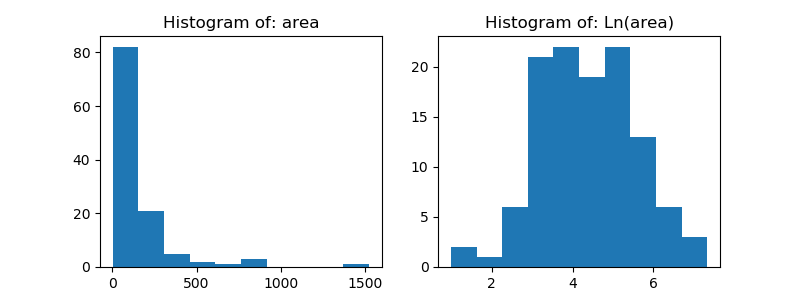

In [8]:
#histigram of data and Ln(data):

plt.figure(figsize=(8, 3))
plt.subplot(1,2,1)
plt.hist(df3[col], 10)
plt.title('Histogram of: '+col)

plt.subplot(1,2,2)
plt.hist(df3['ln(x)'], 10)
plt.title('Histogram of: Ln('+col+')')

plt.show()


## 5. Lognormal statistics
![Lognormal distribution main parameters](https://images.squarespace-cdn.com/content/549dcda5e4b0a47d0ae1db1e/1419800304373-4OVMK4FP5VPG86B11EEB/Skewed_distributions.png?content-type=image%2Fpng)


- Statistical mean from a lognormal distribution is calculated different from a normal distribution, this is the main parameter that  differs between distributions.
- The lognormal mean is calculated here  togheter with the Swanson mean that are an approximation of lognormal mean (swanson's mean= 0.3xP10 + 0.4xP50 + 0.3xP90).
- Truncated mean (P1-P99) is also calculated.


- **Detailed information regarding lognormal distributions:** [https://pt.wikipedia.org/wiki/Distribuição_log-normal](https://pt.wikipedia.org/wiki/Distribuição_log-normal)

---


In [9]:
#sample data distribution statistics:

mu=df3['ln(x)'].mean()
sigma=df3['ln(x)'].std()
p1=df3[col].quantile(0.01)
p10=df3[col].quantile(0.1)
p25=df3[col].quantile(0.25)
p50=df3[col].quantile(0.5)
p75=df3[col].quantile(0.75)
p90=df3[col].quantile(0.9)
p99=df3[col].quantile(0.99)
median=df3[col].median()
mean=df3[col].mean()
logmean=math.exp(mu+((sigma**2)/2))
logstd=math.sqrt(math.exp((2*(mu+sigma**2)))-math.exp(2*mu+sigma**2))
swanmean=(0.3*p10)+(0.4*p50)+(0.3*p90)

#Statistics for P1-P99 truncated (mean and STD):

p1p99=df3.query('99>percentil>1')
mu2=p1p99['ln(x)'].mean()
sigma2=p1p99['ln(x)'].std()

logmeanp1p99=math.exp(mu2+((sigma2**2)/2))
logstdp1p99=math.sqrt(math.exp((2*(mu2+sigma2**2)))-math.exp(2*mu2+sigma2**2))

<IPython.core.display.Javascript object>


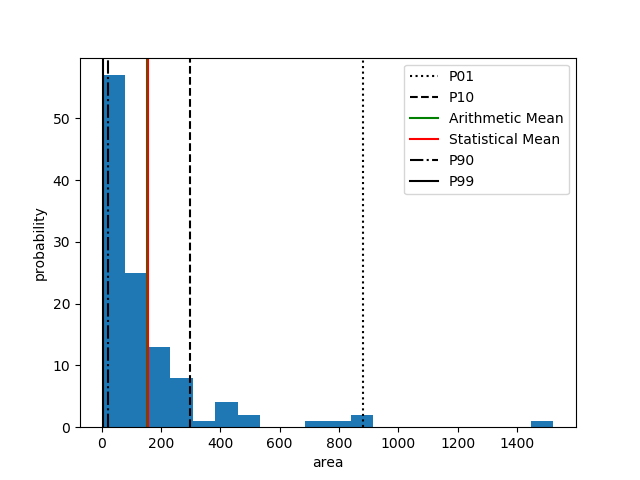

In [10]:
#Ploting histogram of data with details

plt.subplots()
plt.hist(df3[col], 20)

plt.axvline (x=p99, ls=":",color='black', label='P01')
plt.axvline(x=p90, ls="--", color='black', label='P10')
plt.axvline(x=mean, ls="-", color='green', label='Arithmetic Mean')
plt.axvline(x=logmean, ls="-", color='red', label='Statistical Mean')
plt.axvline(x=p10, ls="-.", color='black', label='P90')
plt.axvline(x=p1, ls="-",color='black', label='P99')
plt.xlabel(col)
plt.ylabel('probability')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


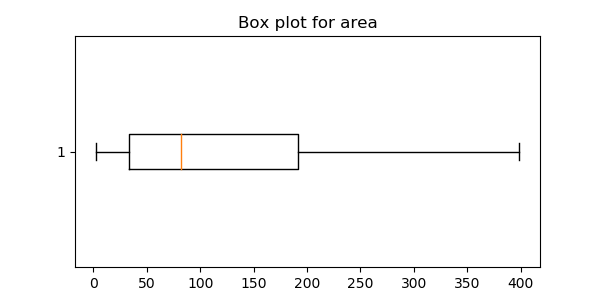

In [11]:
# Boxplot

plt.figure(figsize=(6, 3))

plt.subplot()
plt.boxplot(df3[col], vert=False, showfliers=False)
plt.title("Box plot for "+col)

plt.show()

<IPython.core.display.Javascript object>


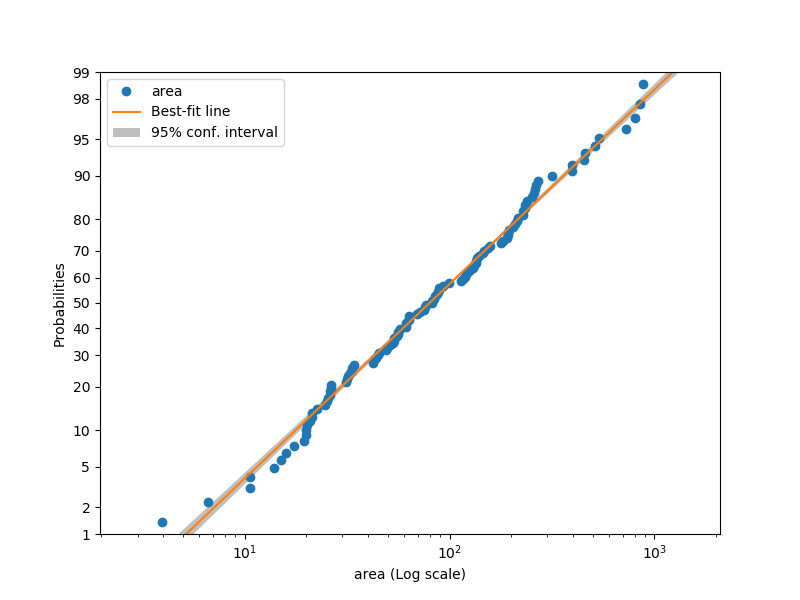

In [12]:
#Ploting cumulative curve with data logscale (similar from Peter Rose Toolbox)

import warnings
warnings.simplefilter('ignore')

fig, ax = plt.subplots(figsize=(8, 6))
fig=probscale.probplot(df3[col], ax=ax, plottype='prob', probax='y', bestfit=True, estimate_ci=True,
                         datascale='log', problabel='Probabilities', datalabel=col+' (Log scale)',
                         scatter_kws=dict(label=col),
                        line_kws=dict(label='Best-fit line'), return_best_fit_results=True)
ax.legend(loc='upper left')
ax.set_ylim(bottom=1, top=99)

plt.show()

<IPython.core.display.Javascript object>


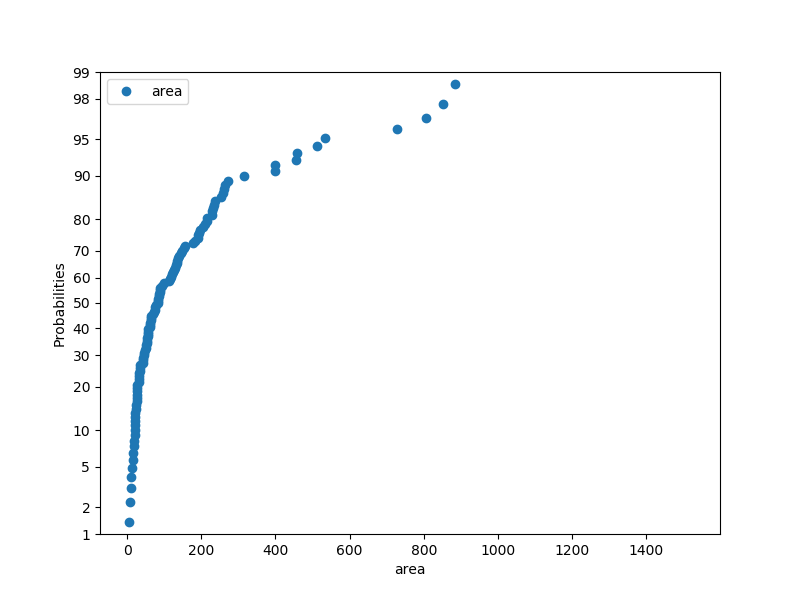

In [13]:
#ploting cumulative curve with data linear scale

warnings.simplefilter('ignore')

fig2, ax = plt.subplots(figsize=(8, 6))
fig2=probscale.probplot(df3[col], ax=ax, plottype='prob', probax='y',
                         datascale='linear', problabel='Probabilities', datalabel=col,
                         scatter_kws=dict(label=col),
                        line_kws=dict(label='Best-fit line'), return_best_fit_results=True)
ax.legend(loc='upper left')
ax.set_ylim(bottom=1, top=99)
#ax.set_xlim(left=1, right=10000)
plt.show()

## 6. Calculated Statistics

In [14]:
#statistics formulas 

def calc(i):
    samples=i.count()
    mean=i.mean()
    mi=i.min()
    ma=i.max()
    kur=i.kurtosis()
    sk=i.skew()
    medi=i.median()
    st=i.std()
    p01=i.quantile(0.001)
    p1=i.quantile(0.01)
    p10=i.quantile(0.1)
    p25=i.quantile(0.25)
    p50=i.quantile(0.5)
    p75=i.quantile(0.75)
    p90=i.quantile(0.9)
    p99=i.quantile(0.99)
    p999=i.quantile(0.999)
    
    print ( '\x1b[04m'+"-Samples:"+'\x1b[0m',samples,
           '\x1b[04m'+"\n-Mean:"+'\x1b[0m', round(mean,2),
            '\x1b[04m'+"\n-Minimum:"+'\x1b[0m',mi,
            '\x1b[04m'+"\n-Maximum:"+'\x1b[0m',ma,
            '\x1b[04m'+"\n-Kurtusis:"+'\x1b[0m',round(kur,2),
            '\x1b[04m'+"\n-Skewness:"+'\x1b[0m',round(sk,2),
            '\x1b[04m'+"\n-Median:"+'\x1b[0m', round(medi,2),
            '\x1b[04m'+"\n-Standart Deviation:"+'\x1b[0m', round(st,2),
            '\x1b[04m'+"\n-P99.9:"+'\x1b[0m',round(p01,2),
            '\x1b[04m'+"\n-P99:"+'\x1b[0m',round(p1,2), 
            '\x1b[04m'+"\n-P90:"+'\x1b[0m',round(p10,2),
            '\x1b[04m'+"\n-P75:"+'\x1b[0m',round(p25,2),
            '\x1b[04m'+"\n-P50:"+'\x1b[0m',round(p50,2),
            '\x1b[04m'+"\n-P25:"+'\x1b[0m',round(p75,2),
            '\x1b[04m'+"\n-P10:"+'\x1b[0m',round(p90,2),
            '\x1b[04m'+"\n-P0.1:"+'\x1b[0m',round(p99,2),
            '\x1b[04m'+"\n-P0.01:"+'\x1b[0m',round(p999,2)
          )

In [15]:
#Statistics results:

print('\x1b[1;01;30;47m'+'STATISTICS FOR '+ col.upper() + ' PARAMETER:'+'\x1b[0m','\n')    
print('\x1b[1;01;31m'+'Input data set Statistics:' +'\x1b[0m')
stat=calc(df3[col])
print('\n',
     '\x1b[1;01;31m'+'Lognormal Statistics:' +'\x1b[0m','\n',
     '\x1b[04m'+'-Statistical mean:'+'\x1b[0m', round(logmean,2),'\n',
     '\x1b[04m'+'-lognormal standart deviation:'+'\x1b[0m',round(logstd,2),'\n',
     '\x1b[04m'+'-Swansons Mean (0.3*P10+0.4*P50+0.3*P90):'+'\x1b[0m', round(swanmean,2),'\n',
     '\n',
     '\x1b[1;01;31m'+ 'Truncated statistics (P1-P99):'+'\x1b[0m','\n',
     '\x1b[04m'+'-Truncated statistical mean:'+'\x1b[0m', round(logmeanp1p99,2),'\n',
     '\x1b[04m'+'-Truncated standart deviation:'+'\x1b[0m', round(logstdp1p99,2))

STATISTICS FOR AREA PARAMETER: 

Input data set Statistics:
-Samples: 115 
-Mean: 152.0 
-Minimum: 2.7 
-Maximum: 1523.22 
-Kurtusis: 16.59 
-Skewness: 3.57 
-Median: 81.82 
-Standart Deviation: 213.63 
-P99.9: 2.84 
-P99: 4.33 
-P90: 20.04 
-P75: 33.57 
-P50: 81.82 
-P25: 191.12 
-P10: 298.05 
-P0.1: 879.64 
-P0.01: 1450.36

 Lognormal Statistics: 
 -Statistical mean: 157.2 
 -lognormal standart deviation: 266.41 
 -Swansons Mean (0.3*P10+0.4*P50+0.3*P90): 128.16 
 
 Truncated statistics (P1-P99): 
 -Truncated statistical mean: 145.98 
 -Truncated standart deviation: 222.02


## 8. Saving data
Option to save all calculated data in .txt format.

File will be saved on the same folder of the excel file loaded for analysis.

---

In [16]:
#Saving results as txt

def calc2(i):
    samples=str(i.count())
    mean=str(i.mean())
    mi=str(i.min())
    ma=str(i.max())
    kur=str(i.kurtosis())
    sk=str(i.skew())
    medi=str(i.median())
    st=str(i.std())
    p01=str(i.quantile(0.001))
    p1=str(i.quantile(0.01))
    p10=str(i.quantile(0.1))
    p25=str(i.quantile(0.25))
    p50=str(i.quantile(0.5))
    p75=str(i.quantile(0.75))
    p90=str(i.quantile(0.9))
    p99=str(i.quantile(0.99))
    p999=str(i.quantile(0.999))
    
    return ("-Samples: "+ samples
           +"\n-Mean: "+ mean
           +"\n-Minimum: "+ mi
           +"\n-Maximum: "+ ma
           +"\n-Kurtusis: "+ kur
           +"\n-Skewness: "+ sk
           +"\n-Median: "+ medi
           +"\n-Standart Deviation: "+st
           +"\n-P99.9: "+p01
           +"\n-P99: "+p1 
           +"\n-P90: "+p10
           +"\n-P75: "+p25
           +"\n-P50: "+p50
           +"\n-P25: "+p75
           +"\n-P10: "+p90
           +"\n-P0.1: "+p99
           +"\n-P0.01: "+p999
          )

file = open(link+col+".txt","w")
file.write('STATISTICS FOR '+col.upper()+ ' PARAMETER:\n'+'\n'
          'Input data set Statistics:\n'+
           calc2(df3[col])+'\n'+
           '\n'+
           'Lognormal Statistics: ' +'\n'+
           '-Statistical mean: '+ str(logmean)+'\n'+
           '-lognormal standart deviation: '+str(logstd)+'\n'+
           '-Swansons Mean (0.3*P10+0.4*P50+0.3*P90): '+str(swanmean)+'\n'+
           '\n'+
           'Truncated statistics (P1-P99):'+'\n'+
           '-Truncated statistical mean:'+str(logmeanp1p99)+'\n'+
           '-Truncated standart deviation:'+str(logstdp1p99)
          )
           
file.close()